Required Imports

In [1]:
import tensorflow as tf      
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt      # allows GUI for printing out the images during Validation 

Downloading the Datasets: The first step is to download the fashion dataset from MNIST which will be used to as the source of images for training, testing, and validation 

In [2]:
my_data = keras.datasets.fashion_mnist
(train_img, train_lab), (test_img, test_lab) = my_data.load_data()              # pre loads the train and test sets for images and labels from MNIST

clothing_categories = ['Tops', 'Pants', 'Sweaters', 'Dresses', 'Jackets', 'Flip Flops', 'Shirts', 'Sneakers', 'Handbags', 'Boots']    # these are the 10 categories used to classify image input 

train_img = train_img/255.0
test_img = test_img/255.0

4422102/4422102 [==============================] - 0s 0us/step


Develop the Model

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),                          # dense layers are layers where neurals are fully connected (each neuron in this layer is connected to every neuron in the previous layer (think surjective functions!))
    keras.layers.Dense(10, activation="softmax")                             
    ])

# relu --> allows us to filter out all non-zero results from the layer (increases precision of training by including a hidden dense layer with relu)
# softmax --> kind of like a probability function where it will pick random weights for each neuron in a layer such that when all weights are summed up in a layer, they add up to 1   


Train the Model

In [4]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])     # set optimizer function to adam alg, loss function to sparse_categorical_crossentropy

In [5]:
model.fit(train_img, train_lab, epochs=5)                         # number of epochs = number of times the nn will see the same image 

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5006 - accuracy: 0.8236
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8663
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3369 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3134 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2953 - accuracy: 0.8911


Evaluate the Model: This step returns the performance of the model by percentage (how often does the model predict the correct match?)  

In [6]:
test_loss, test_acc = model.evaluate(test_img, test_lab)

print("Accuracy of testing: ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3460 - accuracy: 0.8809
Accuracy of testing:  0.8809000253677368


Test the Model: Returns the prediction the model made (does not give us whether or not the prediction is correct or incorrect) 

In [11]:
result = model.predict(test_img)                                                      # result currently will hold predictions of all test images, if you want the results of a particular image from test set, do test_img[index of image you want prediction for]  
print("Most likely match: ", clothing_categories[np.argmax(result[0])])               # np.argmax, returns the index of the largest element in the list 

313/313 [==============================] - 1s 2ms/step
Most likely match:  Boots


Validate the Model : This step allows us to properly check if the model working accurately or not, a.k.a if the model is actually labelling the images correctly

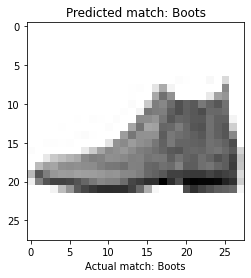

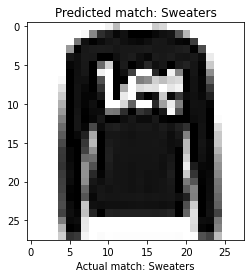

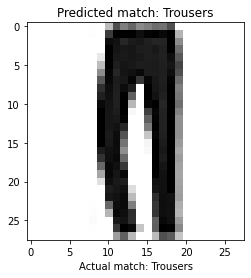

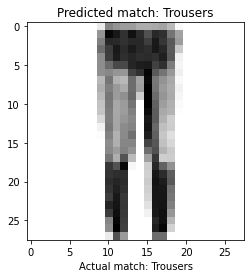

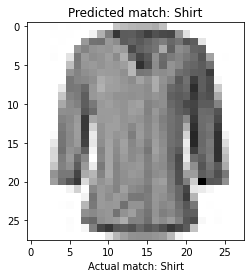

In [17]:
for x in range(5):
  plt.grid(False)
  plt.imshow(test_img[x],  cmap=plt.cm.binary)       # prints the test image being tested 
  plt.xlabel("Actual match: " + clothing_categories[test_lab[x]])
  plt.title("Predicted match: " + clothing_categories[np.argmax(result[x])])
  plt.show()
